<a href="https://colab.research.google.com/github/Bhuvanjeet/Graduate-Rotational-Internship-TSF/blob/main/GRIP_Task_1_TSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Sparks Foundation - Graduate Rotational Internship Program (GRIP)**

![TSF Logo](https://drive.google.com/uc?export=view&id=1Dclq9OlAsBES7hRc-vYTBZFbo_OIZfg8)

**Task - 1**

**By: - Bhuvanjeet Singh Gandhi**

**To Predict the percentage of an student based on the no. of study hours. It is a simple linear regression task as it involves just 2 variables.**

**Notebook Overview:**

**1. Exploratory Data Analysis**

**2. Data Preparation - for ML model**

**3. Linear Regression**

**4. Predictions on Training Data**

**5. Predictions on Test Data**

**6. Results , Evaluation and Metrics**


**Exploratory Data Analysis - EDA**

In [1]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#reading data into dataframe
df=pd.read_csv('http://bit.ly/w-data')

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
#checking for null values in the dataframe(dataset)
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [7]:
#checking for duplicate values
sum(df.duplicated())

0

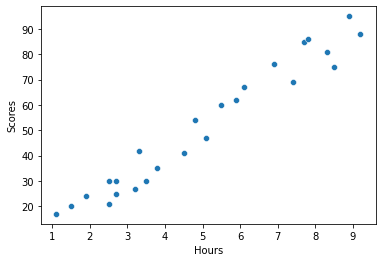

In [14]:
sns.scatterplot(data=df, x="Hours", y="Scores")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


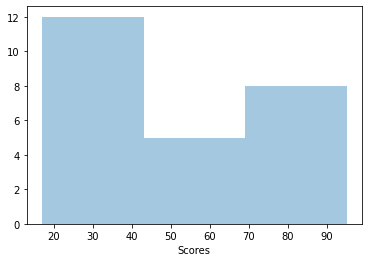

In [19]:
sns.distplot(df['Scores'],kde=False)

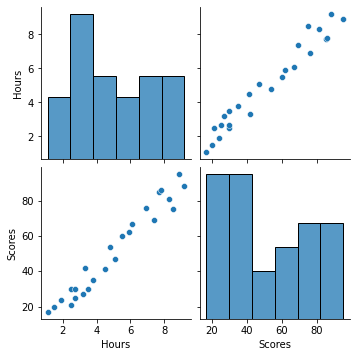

In [20]:
sns.pairplot(df)

In [10]:
#checking correlation
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


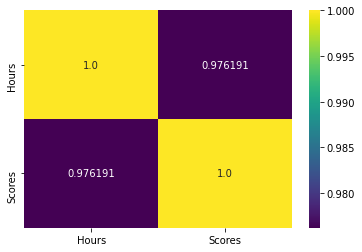

In [24]:
sns.heatmap(df.corr(),cmap='viridis',annot=True,fmt=".6")

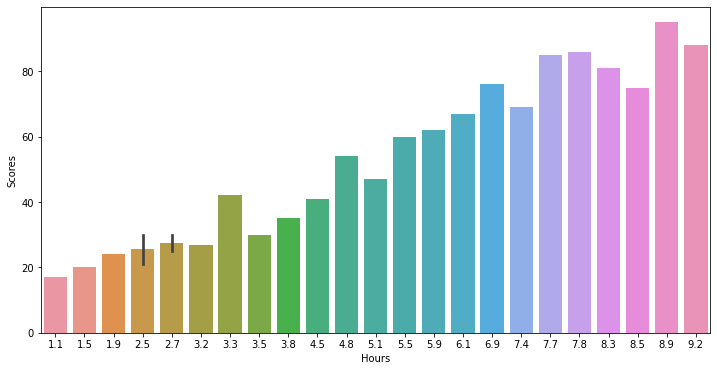

In [28]:
plt.figure(figsize=(12,6))
sns.barplot(x="Hours", y="Scores",data=df)

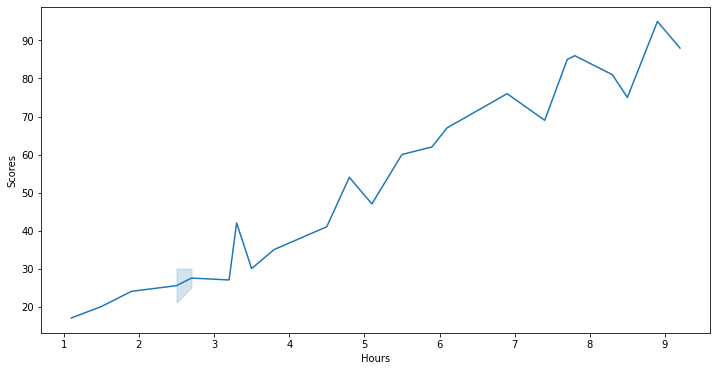

In [29]:
plt.figure(figsize=(12,6))
sns.lineplot(x="Hours", y="Scores",data=df)

**Data Preparation - for ML model**

In [32]:
X=df.iloc[:,0].values
X=X.reshape(-1,1)
y=df.iloc[:,1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

**Linear Regression**

In [33]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Predictions on Training Data**

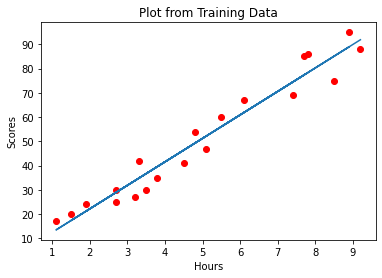

In [42]:
predictions_linear_train=lm.predict(X_train)
plt.scatter(X_train,y_train,c="red")
plt.plot(X_train,predictions_linear_train)
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Plot from Training Data")
plt.show()

**Predictions on Test Data**

In [43]:
predictions_linear_test = lm.predict(X_test)

In [47]:
df_result = pd.DataFrame({'Actual': y_test, 'Predicted': predictions_linear_test})
df_result

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [45]:
lm.intercept_

2.826892353899737

In [46]:
lm.coef_

array([9.68207815])

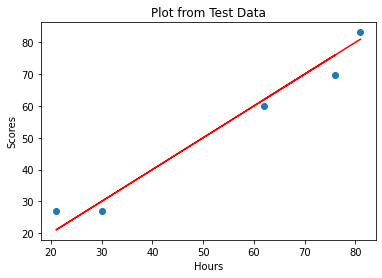

In [48]:
plt.scatter(df_result['Actual'],df_result['Predicted'])
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Plot from Test Data")
plt.plot(y_test,y_test,'r')

**Results , Evaluation and Metrics**

In [44]:
from sklearn import metrics 
print('Results of Linear Regression:\n')
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predictions_linear_test))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,predictions_linear_test))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test,predictions_linear_test)))

Results of Linear Regression:

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288


In [54]:
sample_ip=np.array([9.1]).reshape(-1,1)
sample_op=lm.predict(sample_ip)
print(sample_op)

[90.93380356]


Thus we can infer that to score 90% , a person should study 9.1 hours a day.